In [144]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

## Import Data

In [145]:
carData = pd.read_csv('SG_usedcar.csv')
carData = carData.drop(['Reg_date','Dep','Road Tax','COE','Curb Weight','Manufactured','Transmission','OMV','ARF','Power','Unnamed: 18'],axis=1)

In [146]:
carData.head()

,Brand,Type,Coe_left,Mileage,Dereg Value,Engine Cap,No. of Owners,Price
0,BMW 5 Series 520i Highline,Luxury Sedan,1yr 11mths 21days COE left),N.A,38133,1997,1,54000
1,Honda Vezel 1.5A X Honda Sensing,SUV,4yrs 4mths 7days COE left),50000,31237,1496,2,49800
2,MINI One 1.6A (New 10-yr COE),Hatchback,10yrs COE left),110000,N.A,1598,3,62800
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,7yrs 8mths 5days COE left),N.A,N.A,1591,3,N.A
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,1yr 6mths 21days COE left),203000,6656,1586,2,12800


## Change N.A to nan

In [147]:
carData = carData.replace('N.A',np.nan)
carData = carData.replace('N.A.',np.nan)
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4411 non-null   object
 1   Type           4411 non-null   object
 2   Coe_left       4389 non-null   object
 3   Mileage        2851 non-null   object
 4   Dereg Value    3446 non-null   object
 5   Engine Cap     4408 non-null   object
 6   No. of Owners  4339 non-null   object
 7   Price          3676 non-null   object
dtypes: object(8)
memory usage: 275.8+ KB


In [148]:
# get the number of missing data points per column
missing_values_count = carData.isnull().sum()
missing_values_count

Brand               0
Type                0
Coe_left           22
Mileage          1560
Dereg Value       965
Engine Cap          3
No. of Owners      72
Price             735
dtype: int64

## Removing missing values

In [149]:
carData.dropna(subset=['Brand','Type','Coe_left','Mileage','Dereg Value','Engine Cap','No. of Owners','Price'], inplace=True)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 1 to 4409
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          2631 non-null   object
 1   Type           2631 non-null   object
 2   Coe_left       2631 non-null   object
 3   Mileage        2631 non-null   object
 4   Dereg Value    2631 non-null   object
 5   Engine Cap     2631 non-null   object
 6   No. of Owners  2631 non-null   object
 7   Price          2631 non-null   object
dtypes: object(8)
memory usage: 185.0+ KB


In [150]:
carData.fillna(0, inplace=True)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 1 to 4409
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          2631 non-null   object
 1   Type           2631 non-null   object
 2   Coe_left       2631 non-null   object
 3   Mileage        2631 non-null   object
 4   Dereg Value    2631 non-null   object
 5   Engine Cap     2631 non-null   object
 6   No. of Owners  2631 non-null   object
 7   Price          2631 non-null   object
dtypes: object(8)
memory usage: 185.0+ KB


In [151]:
import warnings 
warnings.simplefilter(action='ignore')

carData['Coe_left_mths'] = 0

# Calculating for COE balance field
for i, v in enumerate(carData['Coe_left']):
    coe_string = str(v).split()
    years = 0
    if 'yrs' in coe_string[0]:
        years = 0
        y = coe_string[0].split('yrs')
        years = int(y[0])
    elif 'yr' in coe_string[0]:
        years = 0
        y = coe_string[0].split('yr')
        years = int(y[0])
    if 'mths' in coe_string[0]:
        mths = 0
        y = coe_string[0].split('mths')
        mths = int(y[0])
    elif 'mth' in coe_string[0]:
        mths = 0
        y = coe_string[0].split('mth')
        mths = int(y[0])
    if 'mths' in coe_string[1]:
        mths = 0
        y = coe_string[1].split('mths')
        mths = int(y[0])
    elif 'mth' in coe_string[1]:
        mths = 0
        y = coe_string[1].split('mth')
        mths = int(y[0])
    if 'days' in coe_string[0]:
        print('Flag car with COE lesser than a month')
        mths = 0
        years = 0
    months = (12*years) + mths
    carData['Coe_left_mths'].loc[i] = months

Flag car with COE lesser than a month
Flag car with COE lesser than a month
Flag car with COE lesser than a month
Flag car with COE lesser than a month


In [152]:
# Renaming columns
carData.rename({'Brand':'Model'},axis='columns',inplace=True)

# Create a new column for data
carData['Brand'] = 0

In [153]:
for i,v in enumerate(carData.Model):
    wordstr = v.split()
    print(wordstr)
    carData['Brand'].loc[i] = str(wordstr[0]) 

['Honda', 'Vezel', '1.5A', 'X', 'Honda', 'Sensing']
['Suzuki', 'Swift', 'Sport', '1.6M', '(COE', 'till', '12/2022)']
['Porsche', '718', 'Cayman', '2.0A', 'PDK']
['Hyundai', 'Elantra', '1.6A', 'Elite']
['Kia', 'Cerato', '1.6A', 'GT', 'Line', 'Sunroof']
['BMW', '3', 'Series', '320i']
['Mitsubishi', 'Lancer', 'EX', '2.0A', 'GLS', '(COE', 'till', '03/2028)']
['Mercedes-Benz', 'E-Class', 'E250', 'Edition', 'E', 'Sunroof']
['Mercedes-Benz', 'C-Class', 'C180', 'Avantgarde']
['Audi', 'S5', 'Sportback', '3.0A', 'TFSI', 'Quattro', '(COE', 'till', '11/2030)']
['Mazda', '3', '1.5A', 'Deluxe']
['Toyota', 'Sienta', '1.5A', 'Standard']
['Toyota', 'Sienta', '1.5A', 'G', 'LED']
['Honda', 'Stream', '1.8A', 'X', '(COE', 'till', '12/2028)']
['Mazda', '3', '1.5A', 'Sunroof']
['BMW', '3', 'Series', '318i', 'Sport']
['Audi', 'A3', 'Sedan', '1.0A', 'TFSI', 'S-tronic']
['Hyundai', 'Starex', '2.5A', 'CRDi']
['BMW', '5', 'Series', '520i', 'Luxury']
['BMW', 'M', 'Series', 'X3', 'M40i']
['BMW', '3', 'Series', '335

['Suzuki', 'Swift', 'Sport', '1.6M', '(COE', 'till', '08/2023)']
['Toyota', 'Corolla', 'Altis', '1.6A', '(COE', 'till', '04/2029)']
['BMW', 'M', 'Series', 'M5', 'Sunroof']
['Mazda', '5', '2.0A', 'Sunroof']
['Mazda', '5', '2.0A', 'Sunroof']
['Mitsubishi', 'Eclipse', 'Cross', '1.5A', 'Sunroof']
['Mercedes-Benz', 'A-Class', 'A180']
['Mercedes-Benz', 'CLA-Class', 'CLA180']
['Aston', 'Martin', 'V8', 'Vantage', 'S', 'Coupe', '4.7A']
['Lexus', 'ES250', 'Luxury', 'Sunroof']
['BMW', '3', 'Series', '318i', 'Sunroof', '(COE', 'till', '04/2026)']
['Honda', 'Fit', '1.3A', 'G', 'F-Package', '(OPC)']
['Volvo', 'XC90', 'T5', 'Momentum']
['Toyota', 'Camry', '2.5A']
['Hyundai', 'Avante', '1.6A', 'S', '(COE', 'till', '06/2024)']
['Nissan', 'Qashqai', '1.2A', 'DIG-T', 'Premium']
['BMW', 'X3', 'xDrive30i', 'M-Sport']
['Subaru', 'Forester', '2.0i-L', 'Sunroof']
['Honda', 'HR-V', '1.5A', 'DX']
['Honda', 'Stream', '1.8A', '(COE', 'till', '09/2023)']
['Jaguar', 'XE', '2.0A', 'Prestige']
['Mercedes-Benz', 'CLA-

['Toyota', 'Corolla', 'Altis', '1.6A', 'Classic']
['Honda', 'Accord', '2.0A', '(COE', 'till', '03/2029)']
['Toyota', 'Wish', '1.8A', '(COE', 'till', '06/2028)']
['BMW', '3', 'Series', '335i', 'Sunroof']
['Mercedes-Benz', 'E-Class', 'E200']
['Nissan', 'Qashqai', '1.2A', 'DIG-T']
['Mazda', '2', 'HB', '1.5A']
['Volvo', 'XC40', 'T4', 'R-Design']
['Maserati', 'Quattroporte', 'GranLusso', '3.0A']
['Honda', 'Accord', 'Euro', 'R', '2.0M', '(COE', 'till', '09/2027)']
['MINI', 'Cooper', 'S', 'Countryman', '1.6A']
['Mazda', '3', '1.5A', 'Deluxe']
['Kia', 'Cerato', '1.6A', 'LX']
['Nissan', 'Qashqai', '1.2A', 'DIG-T']
['Mazda', '3', '1.5A', 'Sunroof']
['Audi', 'Q5', '2.0A', 'TFSI', 'Quattro']
['BMW', '3', 'Series', '320i']
['BMW', '5', 'Series', '535i', 'Sunroof', '(COE', 'till', '04/2031)']
['Mitsubishi', 'Outlander', '2.4A', 'Sunroof']
['Honda', 'Fit', '1.3A', 'G', 'F-Package']
['Kia', 'Cerato', 'Forte', '1.6A', 'SX', '5DR']
['Toyota', 'Fortuner', '2.7A']
['Mercedes-Benz', 'GLC-Class', 'GLC300', 

['Mercedes-Benz', 'GLA-Class', 'GLA180', 'Urban', 'Edition']
['Mercedes-Benz', 'GLA-Class', 'GLA180', 'Urban', 'Edition']
['Porsche', '911', 'Carrera', 'GTS', 'Coupe', '3.8A', 'PDK', '(COE', 'till', '05/2031)']
['Subaru', 'Impreza', '1.6A', '(COE', 'till', '03/2022)']
['Land', 'Rover', 'Range', 'Rover', 'Evoque', '2.0A', '3DR']
['Mercedes-Benz', 'CLA-Class', 'CLA180', 'AMG', 'Line']
['MINI', 'John', 'Cooper', 'Works', '2.0A']
['Toyota', 'Vellfire', '2.5A', 'X']
['Mercedes-Benz', 'E-Class', 'E250', 'CGI', 'Cabriolet', '(COE', 'till', '08/2030)']
['Honda', 'Civic', '1.5A', 'VTEC', 'Turbo', 'Sunroof']
['Honda', 'Jazz', '1.3A', 'L', '(COE', 'till', '04/2024)']
['Honda', 'Jazz', '1.5A', 'RS']
['Volkswagen', 'Golf', '1.4A', 'TSI', 'R-Line', 'Sunroof']
['BMW', 'M', 'Series', 'M6', 'Gran', 'Coupe']
['Volkswagen', 'Passat', '1.8A', 'TSI', 'Highline', 'Sunroof']
['Mercedes-Benz', 'A-Class', 'Saloon', 'A200', 'AMG', 'Line', 'Premium', 'Plus']
['BMW', '3', 'Series', '325i', 'Coupe', 'XL', '(COE', 

['Mercedes-Benz', 'E-Class', 'E200', 'Mild', 'Hybrid', 'AMG', 'Line']
['Audi', 'A5', 'Sportback', '2.0A', 'TFSI', 'S-tronic', 'Design']
['Peugeot', '5008', '1.6A', 'Puretech', 'EAT8', 'Allure']
['Toyota', 'Harrier', '2.4A', 'G', '(COE', 'till', '05/2022)']
['Mercedes-Benz', 'GLA-Class', 'GLA180', 'Urban', 'Edition']
['Toyota', 'Wish', '1.8A', 'Elegance', '(OPC)']
['BMW', '3', 'Series', '318i']
['Kia', 'Cerato', 'K3', '1.6A', 'SX', 'Sunroof', '(OPC)']
['Maserati', 'Ghibli', '3.0A']
['Honda', 'City', '1.5A', 'SV']
['BMW', 'X3', 'sDrive20i', 'M-Sport']
['Mercedes-Benz', 'GLA-Class', 'GLA180', 'AMG', 'Line']
['Opel', 'Astra', '1.0A', 'Turbo']
['Mercedes-Benz', 'E-Class', 'E300', 'Cabriolet', 'AMG', 'Line', 'Premium', 'Plus']
['BMW', '4', 'Series', '428i', 'Coupe', 'Sunroof']
['BMW', '4', 'Series', '428i', 'Gran', 'Coupe', 'Sport', 'Sunroof']
['Mitsubishi', 'Lancer', 'EX', '2.0M', 'GT', '(COE', 'till', '05/2029)']
['Mitsubishi', 'Outlander', '2.4A']
['Honda', 'Jazz', '1.5A', 'RS']
['Skoda',

['Mercedes-Benz', 'C-Class', 'C180K', '(COE', 'till', '05/2029)']
['Audi', 'A3', 'Sedan', '1.4A', 'TFSI', 'S-tronic', 'Ambiente']
['Mercedes-Benz', 'S-Class', 'S400L']
['Kia', 'Cerato', 'Forte', '1.6A', 'SX', '5DR']
['Toyota', 'Wish', '1.8A', 'X', '(COE', 'till', '09/2029)']
['Ferrari', '458', 'Italia', '(COE', 'till', '06/2030)']
['Mercedes-Benz', 'E-Class', 'E200']
['Mazda', 'MX-5', 'Roadster', '2.0A', 'RHT', '(COE', 'till', '05/2028)']
['Volkswagen', 'Sportsvan', '1.4A', 'Highline']
['Nissan', 'Qashqai', '1.2A', 'DIG-T', 'Premium']
['Lexus', 'IS250', '(COE', 'till', '03/2029)']
['Honda', 'Civic', '1.6A', 'VTi', '(OPC)']
['Honda', 'Fit', '1.3A', 'G', 'F-Package']
['Toyota', 'Corolla', 'Altis', '1.6A', 'Standard']
['Lexus', 'NX', 'Turbo', 'NX200t', 'Executive']
['BMW', '3', 'Series', '318i', 'Sport']
['Mercedes-Benz', 'E-Class', 'E250', 'Avantgarde']
['Mercedes-Benz', 'A-Class', 'A200']
['BMW', '5', 'Series', '520i']
['Honda', 'Stream', '1.8A', '(COE', 'till', '06/2023)']
['Mercedes-B

['Suzuki', 'Swift', 'Mega', 'Sports', '1.6M', '(COE', 'till', '09/2027)']
['MINI', 'One', '1.5A', '5DR']
['Mercedes-Benz', 'E-Class', 'E250', 'CGI', 'Avantgarde', '(COE', 'till', '04/2030)']
['Toyota', 'Harrier', '2.0A', 'Elegance', 'Panoramic']
['Honda', 'Mobilio', '1.5A', 'RS', 'i-VTEC', 'Luxe']
['Volkswagen', 'Golf', '1.4A', 'TSI', 'Sunroof']
['Mercedes-Benz', 'CLA-Class', 'CLA45', 'S', 'AMG', '4MATIC+', 'Plus']
['Mitsubishi', 'Lancer', '1.6M', 'GLX', '(COE', 'till', '05/2024)']
['Lexus', 'ES250', 'Executive', 'Sunroof']
['Suzuki', 'Vitara', '1.6A', 'GLX', 'Sunroof']
['Honda', 'Civic', '1.6A', 'VTi', '(COE', 'till', '08/2030)']
['Volkswagen', 'Golf', 'Cabriolet', '1.4A', 'TSI']
['Volkswagen', 'Jetta', 'GP', '1.4A', 'TSI', 'Highline']
['Nissan', 'Teana', '2.5A', '(COE', 'till', '08/2024)']
['Mercedes-Benz', 'E-Class', 'E200', '(COE', 'till', '07/2028)']
['BMW', 'X3', 'sDrive20i', 'M-Sport', 'Sunroof']
['Kia', 'Cerato', 'Forte', '1.6A', 'SX', '(COE', 'till', '09/2025)']
['Honda', 'Str

In [154]:
def extract_brand(brand_model):
    if isinstance(brand_model, str):  # Check if the input is a string
        # Split the string by spaces
        parts = brand_model.split()
        # Assuming the brand is the first part of the string
        return parts[0]
    else:
        return None  # Return None for non-string inputs

In [155]:
carData['Brand'] = carData['Brand'].apply(extract_brand)


In [156]:
carData['Brand']

1       Suzuki
4          Kia
5          BMW
13       Honda
15         BMW
         ...  
4404      None
4405      None
4406      None
4407      None
4409      None
Name: Brand, Length: 2631, dtype: object

In [157]:
carData['Brand'].value_counts()

Brand
Mercedes-Benz    215
Toyota           209
Honda            197
BMW              154
Audi              75
Nissan            72
Mitsubishi        71
Mazda             66
Volkswagen        62
Hyundai           55
Kia               50
Subaru            36
MINI              26
Volvo             24
Porsche           23
Lexus             21
Suzuki            15
Land               9
Chevrolet          8
Ford               7
Peugeot            7
Bentley            7
Skoda              7
Opel               6
Infiniti           6
Citroen            5
Hino               4
Maserati           4
SEAT               4
McLaren            3
Lamborghini        3
Renault            3
Ferrari            3
Isuzu              2
Proton             2
Fiat               2
Jaguar             2
Jeep               2
Alfa               1
Perodua            1
Daihatsu           1
Hummer             1
Maxus              1
Rolls-Royce        1
Cadillac           1
Name: count, dtype: int64

In [158]:
carData.columns

Index(['Model', 'Type', 'Coe_left', 'Mileage', 'Dereg Value', 'Engine Cap',
       'No. of Owners', 'Price', 'Coe_left_mths', 'Brand'],
      dtype='object')

In [159]:
# create a list of fields to be converted to int
convert_dict = {'Mileage': 'int64','No. of Owners': 'int64','Price': 'int64',
                'Dereg Value':'int64','Engine Cap':'int64','Type':'category'}

In [160]:
carData = carData.astype(convert_dict)

In [161]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 1 to 4409
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Model          2631 non-null   object  
 1   Type           2631 non-null   category
 2   Coe_left       2631 non-null   object  
 3   Mileage        2631 non-null   int64   
 4   Dereg Value    2631 non-null   int64   
 5   Engine Cap     2631 non-null   int64   
 6   No. of Owners  2631 non-null   int64   
 7   Price          2631 non-null   int64   
 8   Coe_left_mths  2631 non-null   int64   
 9   Brand          1474 non-null   object  
dtypes: category(1), int64(6), object(3)
memory usage: 273.0+ KB


In [162]:
carDF=pd.DataFrame(carData[['Brand','Type','Coe_left_mths']])
carDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 1 to 4409
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Brand          1474 non-null   object  
 1   Type           2631 non-null   category
 2   Coe_left_mths  2631 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 129.1+ KB


In [163]:
carDF.describe()

,Coe_left_mths
count,2631.000000
mean,39.827822
std,41.216082
min,0.000000
25%,0.000000
50%,30.000000
75%,77.000000
max,119.000000


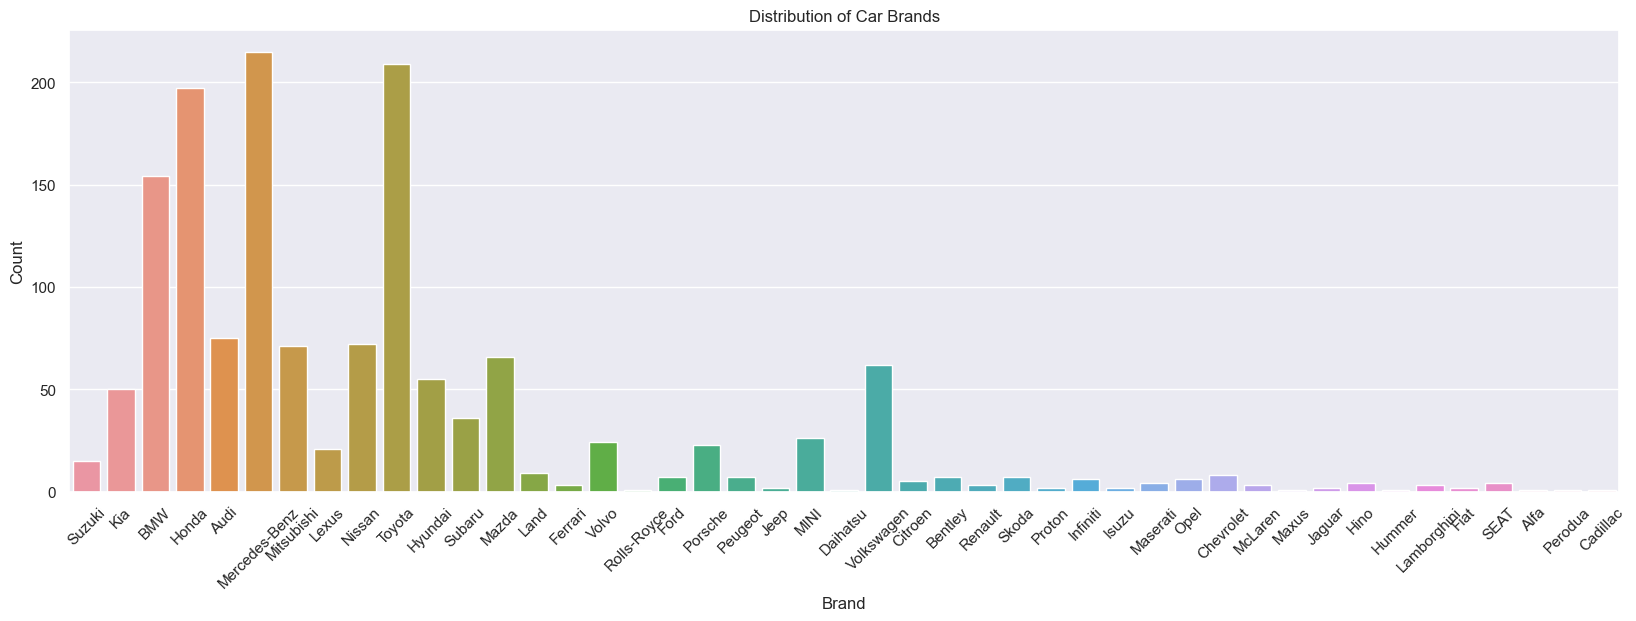

In [164]:
plt.figure(figsize=(20, 6))
sb.countplot(x='Brand', data=carDF)
plt.title('Distribution of Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

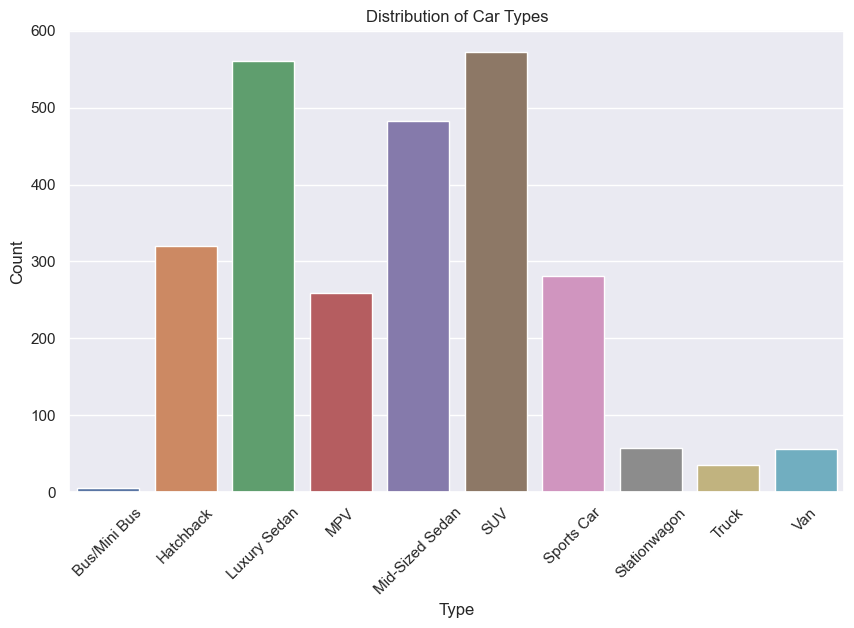

In [165]:
plt.figure(figsize=(10, 6))
sb.countplot(x='Type', data=carDF)
plt.title('Distribution of Car Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

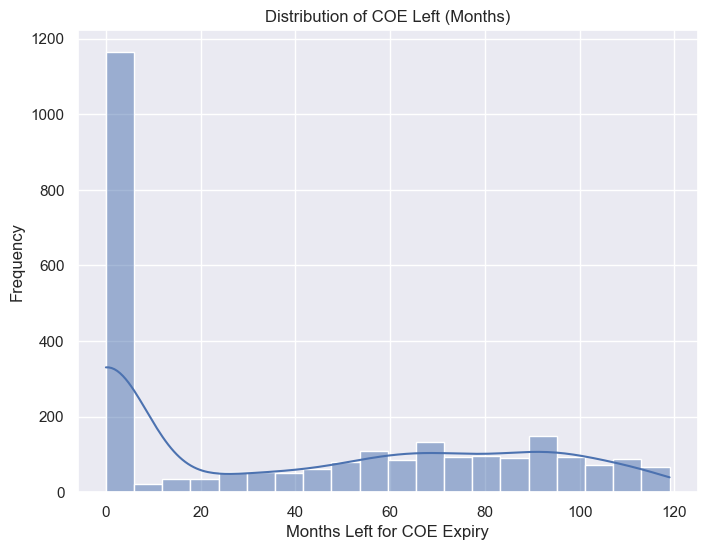

In [166]:
plt.figure(figsize=(8, 6))
sb.histplot(carDF['Coe_left_mths'], bins=20, kde=True)
plt.title('Distribution of COE Left (Months)')
plt.xlabel('Months Left for COE Expiry')
plt.ylabel('Frequency')
plt.show()


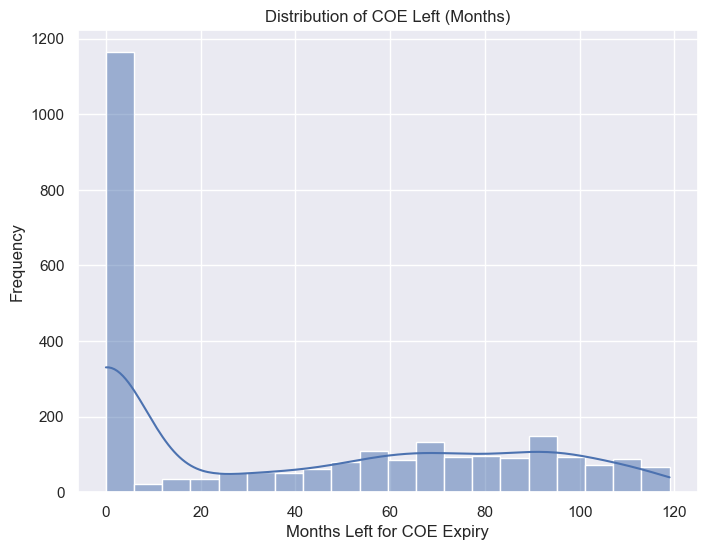

In [167]:
plt.figure(figsize=(8, 6))
sb.histplot(carDF['Coe_left_mths'], bins=20, kde=True)
plt.title('Distribution of COE Left (Months)')
plt.xlabel('Months Left for COE Expiry')
plt.ylabel('Frequency')
plt.show()


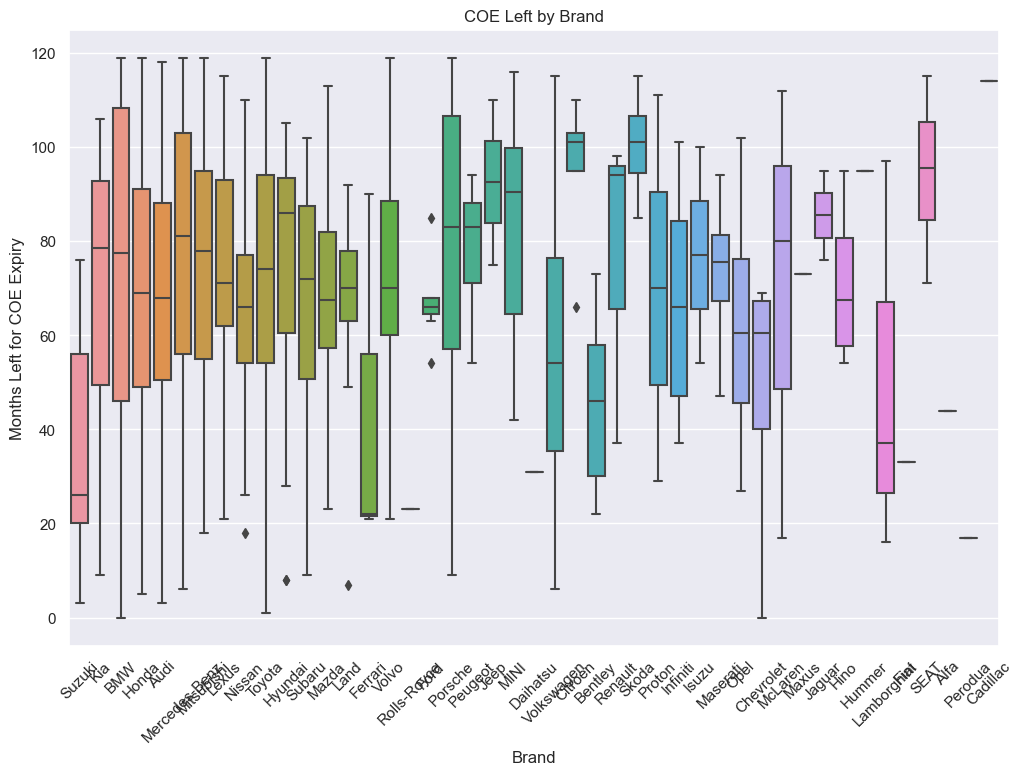

In [168]:
plt.figure(figsize=(12, 8))
sb.boxplot(x='Brand', y='Coe_left_mths', data=carDF)
plt.title('COE Left by Brand')
plt.xlabel('Brand')
plt.ylabel('Months Left for COE Expiry')
plt.xticks(rotation=45)
plt.show()


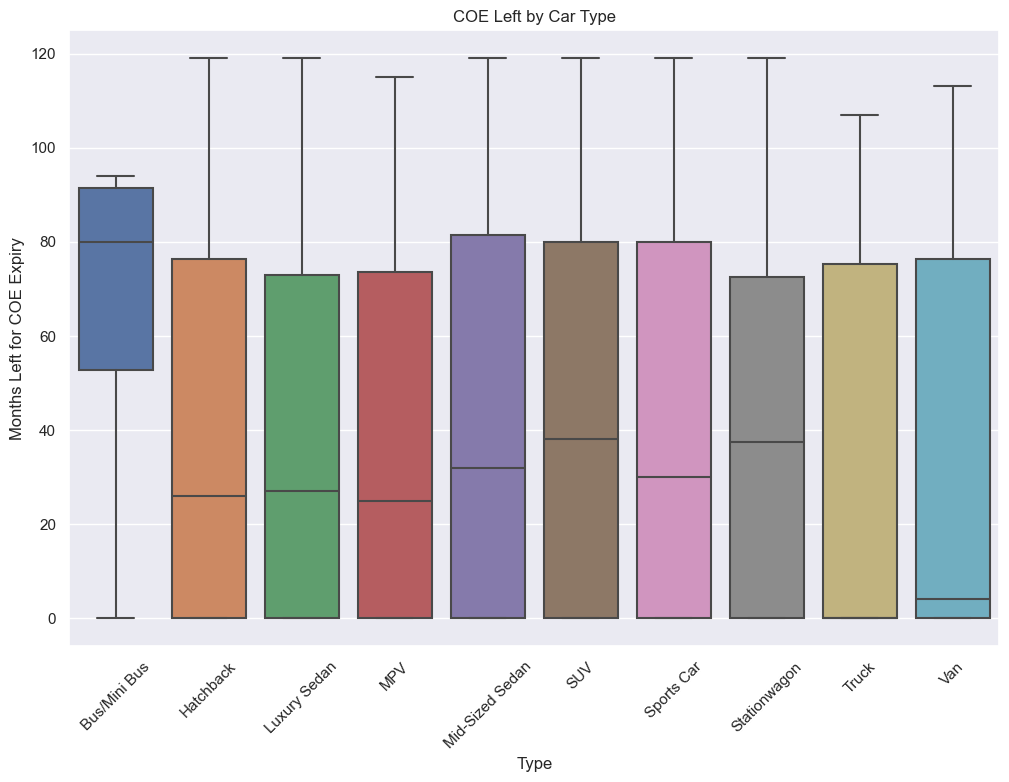

In [169]:
plt.figure(figsize=(12, 8))
sb.boxplot(x='Type', y='Coe_left_mths', data=carDF)
plt.title('COE Left by Car Type')
plt.xlabel('Type')
plt.ylabel('Months Left for COE Expiry')
plt.xticks(rotation=45)
plt.show()


In [175]:
X_brand = carData[['Brand']]  # Predictor variable
y_brand = carData['Price']       # Target variable

X_type = carData[['Type']]      # Predictor variable
y_type = carData['Price']         # Target variable

X_coe = carData[['Coe_left_mths']]      # Predictor variable
y_coe = carData['Price']         # Target variable


In [176]:
encoder = OneHotEncoder()
X_brand_encoded = encoder.fit_transform(X_brand)
X_type_encoded = encoder.fit_transform(X_type)

In [177]:
X_brand_train, X_brand_test, y_brand_train, y_brand_test = train_test_split(X_brand_encoded, y_brand, test_size=0.25, random_state=0)
X_type_train, X_type_test, y_type_train, y_type_test = train_test_split(X_type_encoded, y_type, test_size=0.25, random_state=0)
X_coe_train, X_coe_test, y_coe_train, y_coe_test = train_test_split(X_coe, y_coe, test_size=0.25, random_state=0)


In [178]:
# Create linear regression models
reg_brand = LinearRegression()
reg_type = LinearRegression()
reg_coe = LinearRegression()

# Fit the models
reg_brand.fit(X_brand_train, y_brand_train)
reg_type.fit(X_type_train, y_type_train)
reg_coe.fit(X_coe_train, y_coe_train)

# Predictions
y_brand_pred = reg_brand.predict(X_brand_test)
y_type_pred = reg_type.predict(X_type_test)
y_coe_pred = reg_coe.predict(X_coe_test)



In [179]:
# Calculate MSE and R^2 for each predictor
mse_brand = mean_squared_error(y_brand_test, y_brand_pred)
r2_brand = r2_score(y_brand_test, y_brand_pred)

mse_type = mean_squared_error(y_type_test, y_type_pred)
r2_type = r2_score(y_type_test, y_type_pred)

mse_coe = mean_squared_error(y_coe_test, y_coe_pred)
r2_coe = r2_score(y_coe_test, y_coe_pred)

print("Brand Predictor:")
print("MSE:", mse_brand)
print("R^2:", r2_brand)

print("\nType Predictor:")
print("MSE:", mse_type)
print("R^2:", r2_type)

print("\nCOE Left Predictor:")
print("MSE:", mse_coe)
print("R^2:", r2_coe)

Brand Predictor:
MSE: 12140763482.438572
R^2: -0.005847284048177803

Type Predictor:
MSE: 10231988484.586412
R^2: 0.15229237086115455

COE Left Predictor:
MSE: 12094096473.078577
R^2: -0.0019809798666245992
